# Guided Project: Finding Heavy Traffic Indicators on I-94


# Introduction


Project:

This project analyzes westbound traffic on the I-94

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.**

Datset Dictionary:

- holiday - Categorical US National holidays plus regional holiday, Minnesota State Fair
- temp - Numeric Average temp in kelvin
- rain_1h - Numeric Amount in mm of rain that occurred in the hour
- snow_1h - Numeric Amount in mm of snow that occurred in the hour
- clouds_all - Numeric Percentage of cloud cover
- weather_main - Categorical Short textual description of the current weather
- weather_description - Categorical Longer textual description of the current weather
- date_time - DateTime Hour of the data collected in local CST time
- traffic_volume - Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
interstate = pd.read_csv('Interstate.csv')

In [2]:
interstate.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
interstate.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
interstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


# Analyzing Traffic Volume

In [5]:
#Frequency table for values in traffic volume column + sorts values

interstate['traffic_volume'].value_counts(bins=10).sort_index()

(-7.281000000000001, 728.0]    8095
(728.0, 1456.0]                5100
(1456.0, 2184.0]               2835
(2184.0, 2912.0]               4765
(2912.0, 3640.0]               4761
(3640.0, 4368.0]               4349
(4368.0, 5096.0]               7886
(5096.0, 5824.0]               5634
(5824.0, 6552.0]               3854
(6552.0, 7280.0]                925
Name: traffic_volume, dtype: int64

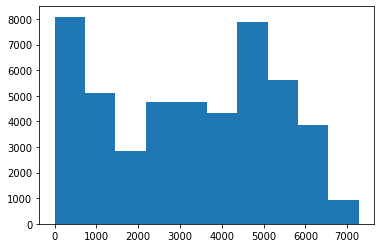

In [6]:
#Plot a histogram to examine the distribution of the traffic_volume column. Use a Pandas method

plt.hist(interstate['traffic_volume'])
plt.show()

In [7]:
interstate['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Based on the histogram, there are 2 peaks, which could be do to rush hour. The lower frequencies of traffic volume can be off hours.

Additionally:

- About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
- About 25% of the time, the traffic volume was four times as much (4,933 cars or more).

# Traffic Volume Day vs Night

Night and Day may certainly influence the data in our histogram. We will divide the data into DAYTIME and NIGHT TIME. 

Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)


In [8]:
#transform the date_time column to datetime data type
interstate['date_time'] = pd.to_datetime(interstate['date_time'])

In [9]:
interstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [10]:
#Use the Series.dt.hour property to get the hour of every instance of the date_time column and do the following:
#Isolate the daytime data.
#Isolate the nighttime data.

day_time = interstate.copy()[(interstate['date_time'].dt.hour >= 7) & (interstate['date_time'].dt.hour < 19)]
print(day_time.shape)

night_time = interstate.copy()[(interstate['date_time'].dt.hour >= 19) | (interstate['date_time'].dt.hour < 7)]
print(night_time.shape)

(23877, 9)
(24327, 9)


In [11]:
day_time['traffic_volume']

0        5545
1        4516
2        4767
3        5026
4        4918
         ... 
48194    4302
48195    4302
48196    4283
48197    4132
48198    3947
Name: traffic_volume, Length: 23877, dtype: int64

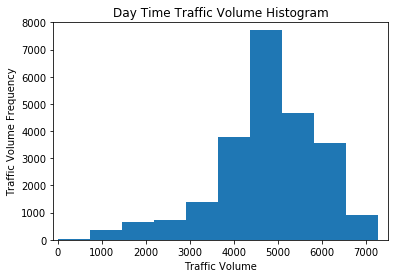

In [14]:
# Day Time traffic volume histogram
plt.hist(day_time['traffic_volume'])
plt.title('Day Time Traffic Volume Histogram')
plt.xlabel('Traffic Volume')
plt.ylabel('Traffic Volume Frequency')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.show()

In [13]:
day_time['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

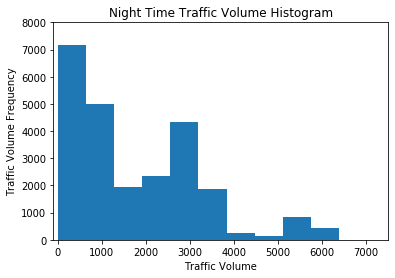

In [15]:
# Night Time traffic volume histogram

plt.hist(night_time['traffic_volume'])
plt.title('Night Time Traffic Volume Histogram')
plt.xlabel('Traffic Volume')
plt.ylabel('Traffic Volume Frequency')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.show()

In [16]:
night_time['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The Daytime data looks like a symmetrical or normal distribution
The Night Time's histogram indicates that the majority of the volume is low

Night Time Traffic is fairly light, so we will now focus on **Day Time data**

# Time indicators

In [17]:
#Create new column for month, group by each month and find the average
day_time['month'] = day_time['date_time'].dt.month
by_month = day_time.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

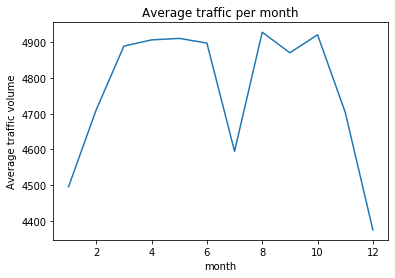

In [18]:
#Create line plot from above Group by

by_month['traffic_volume'].plot.line()
plt.title('Average traffic per month')
plt.ylabel('Average traffic volume')
plt.show()

The line plot for Months shows that average traffic rises from Winter to Spring, but for some reason dips in July. As months get colder traffic also dips. 

In [19]:
#Create new column for day of week, group by each day of week and find the average

day_time['dayofweek'] = day_time['date_time'].dt.dayofweek
by_dayofweek = day_time.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday


dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

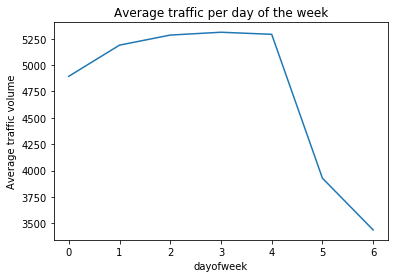

In [20]:
#Create line plot from above Group by

by_dayofweek['traffic_volume'].plot.line()
plt.title('Average traffic per day of the week')
plt.ylabel('Average traffic volume')
plt.show()

The line plot for Day of the week shows a siginificant decrease in volume for Saturday and Sundays

In [21]:
#Split the Day of Week Data between **Weekday and Weekend Days**

day_time['hour'] = day_time['date_time'].dt.hour
bussiness_days = day_time.copy()[day_time['dayofweek'] <= 4] # 4 == Friday
weekend = day_time.copy()[day_time['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


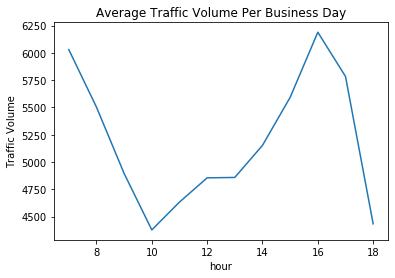

In [24]:
#Plot the Business Day Data

by_hour_business['traffic_volume'].plot.line()
plt.title('Average Traffic Volume Per Business Day')
plt.ylabel('Traffic Volume')
plt.show()


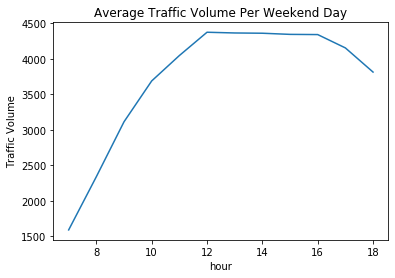

In [26]:
#Plot the Weekend Data

by_hour_weekend['traffic_volume'].plot.line()
plt.title('Average Traffic Volume Per Weekend Day')
plt.ylabel('Traffic Volume')
plt.show()


When comparing the Business Day vs Weekend traffic volume per hour, we see that on Business days traffic volume increases during rush hour and decrease afterward. On weekends, traffic volume steadily increases throghout the day, pleateaus from hours 12 - 16, and begins to decline later into the night 


# Weather indicators

In [27]:
#Find the correlation values between traffic volume and the numerical weather columns.

day_time.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

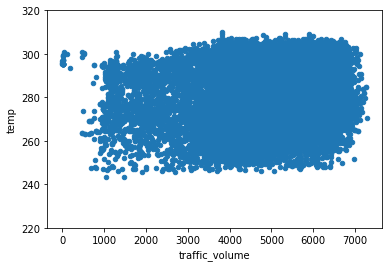

In [33]:
#Temperature has the strongest correlation with Traffic Volume.
#Plot Scatterplot

day_time.plot.scatter('traffic_volume', 'temp')
plt.ylim(220, 320)
plt.show()

The above scatter plot is not very helpful. There is no clear trend between temperature and traffic volume. 

# Weather Types

The previous correlation between traffic volume and temperature was not that helpful. 
Instead, we will use weather_main and weather_description in our analysis.

In [46]:
by_weather_main = day_time.groupby('weather_main').mean()
by_weather_description = day_time.groupby('weather_description').mean()



<class 'pandas.core.frame.DataFrame'>


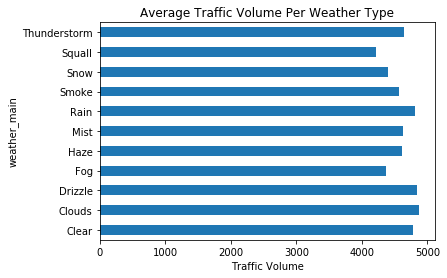

In [45]:
#Plot a horizontal bar plot for the traffic_volume column of by_weather_main.
by_weather_main['traffic_volume'].plot.barh()
plt.title('Average Traffic Volume Per Weather Type')
plt.xlabel('Traffic Volume')
plt.show()

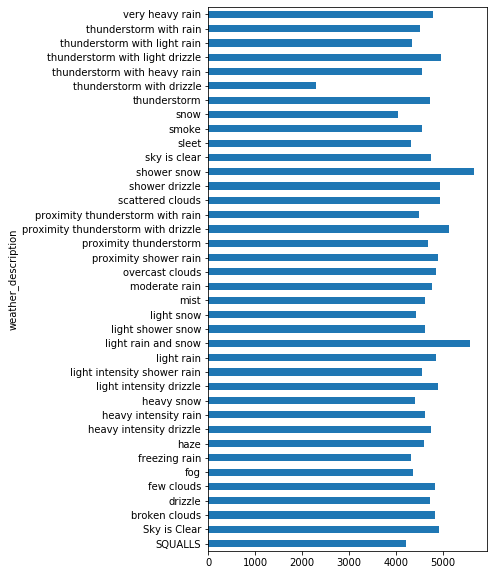

In [53]:
#Plot a horizontal bar plot for the traffic_volume column of by_weather_description. 

by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()


There are three weather types where traffic volume exceeds 5,000:

Shower snow
Light rain and snow
Proximity thunderstorm with drizzle

# Conclusions


In this project, we tried to find a few indicators of the heavy traffic on the I-94 Interstate highway. We found two types of indicators:

Time indicators
- The traffic is usually heavier during warm months compared to colder months
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are around 7 and 16, and volume decreases outside these hours

Weather indicators
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle